# Plotting and visualising

Matplot is a python library that makes it easy to plot data. Look at the [examples](https://matplotlib.org/stable/plot_types/index.html)

First, we need to import the library:

In [3]:
import matplotlib.pyplot as plt

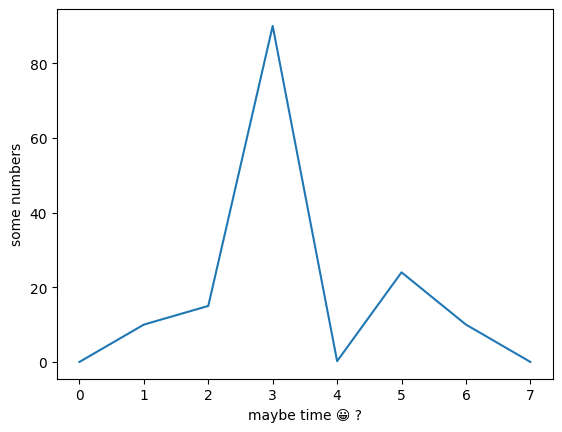

In [4]:
values = [0,10,15,90,0.2,24,10,0] # a list of random numbers

plt.plot(values) # passing the list of values to the plot() function
plt.ylabel('some numbers') # labelling the y-axis 
plt.xlabel('maybe time 😀 ?') # labelling the y-axis 
plt.show() # finally displaying the plot

The ```plt``` class has lots of different functions. See the plot [documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) for further parameters

Customise the plot by passing additional parameters to the curve:

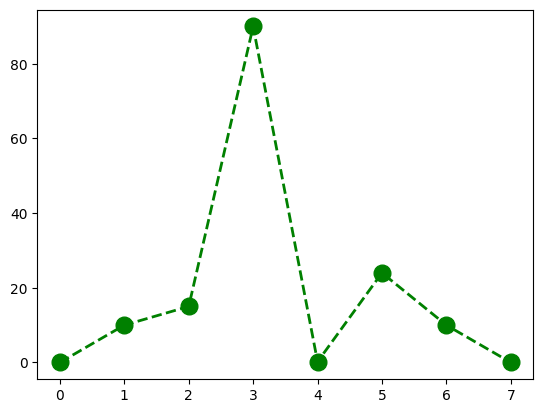

In [5]:
#plt.plot(values) # passing the list of values to the plot() function
plt.plot(values,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.show()

## Saving plot

Matplot outputs the visualisations directly in the jupyter notebook. You can also export the visuals as vector-based file format by calling the ```savefig``` function. The parameter inside is the filename including the folder path.

Within the colab environment there's no disk space to save on. We can however make use of the sample_data folder that is available during the session and which will be deleted once you leave Colab. Files should appear here [image]

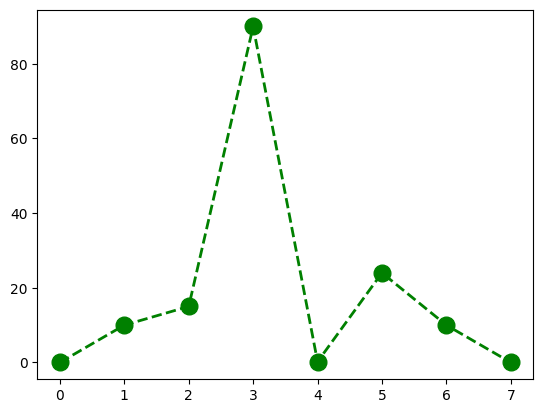

In [31]:
plt.plot(values,color='green', marker='o', linestyle='dashed',linewidth=2, markersize=12)
plt.savefig('sample_data/foo.png') # rasterized image
plt.savefig('sample_data/foo.pdf') # vector based format

## Changing size

The output size of the plot can be changed before exporting

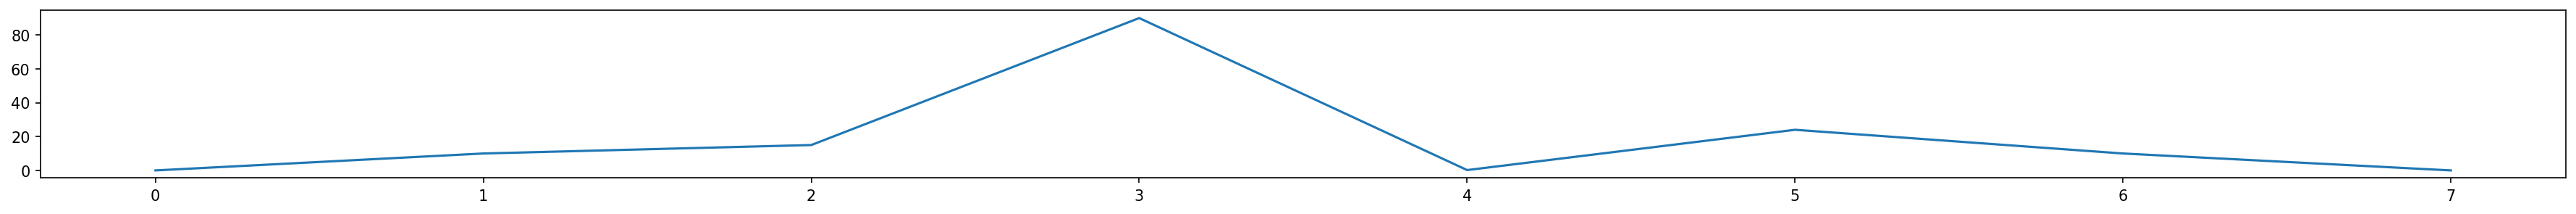

In [15]:
from matplotlib.pyplot import figure

figure(figsize=(30,2), dpi=150)
plt.plot(values)

## Complex data (pandas)